In [1]:
from midi_functions import *

In [2]:
midi_list = find_midis_in_folder('jazz_midis/')

In [3]:
len(midi_list)

321

In [19]:
# quick_listen_to_midi(midi_list[123], 'soundfonts/donkey_kong_country_soundfont_collection/Donkey Kong Country 2012.sf2', 'test_output')

In [4]:
from mido import MidiFile
midi_data = MidiFile(midi_list[0])
messages = [msg for msg in midi_data]

In [6]:
encode_midi_properties(midi_list[0])

array([['control_change', '0', '-1', ..., '100', '0', '0'],
       ['control_change', '0', '-1', ..., '101', '0', '0'],
       ['control_change', '0', '-1', ..., '6', '12', '0'],
       ...,
       ['note_off', '0', '52', ..., '-1', '-1', '0'],
       ['note_off', '0', '45', ..., '-1', '-1', '0'],
       ['note_off', '4', '33', ..., '-1', '-1', '0']], dtype='<U21')

In [7]:
# decode_midi_properties(encode_midi_properties(midi_list[0]))

In [8]:
import numpy as np

In [9]:
from tqdm import tqdm

In [10]:
num_features = encode_midi_properties(midi_list[0]).shape[-1]

output_folder = 'jazz_midi_npys/'

tokenizer = MidiTokenizer(num_features=num_features)

tokenizer_save_file = 'model_states/jazz_tokenizer'

# try:
#     tokenizer.load(tokenizer_save_file)
# except:
#     pass

In [11]:
encode_midi_properties(midi_list[0])

array([['control_change', '0', '-1', ..., '100', '0', '0'],
       ['control_change', '0', '-1', ..., '101', '0', '0'],
       ['control_change', '0', '-1', ..., '6', '12', '0'],
       ...,
       ['note_off', '0', '52', ..., '-1', '-1', '0'],
       ['note_off', '0', '45', ..., '-1', '-1', '0'],
       ['note_off', '4', '33', ..., '-1', '-1', '0']], dtype='<U21')

In [12]:
tokenizer.tokenize(encode_midi_properties(midi_list[0]))

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  2,  1,  1],
       [ 1,  1,  1, ...,  3,  2,  1],
       ...,
       [ 5,  1, 22, ...,  4,  3,  1],
       [ 5,  1,  5, ...,  4,  3,  1],
       [ 5,  5, 14, ...,  4,  3,  1]])

In [13]:
tokenizer.detokenize(tokenizer.tokenize(encode_midi_properties(midi_list[0])))[:100]

array([['control_change', '0', '-1', '-1', '-1', '100', '0', '0'],
       ['control_change', '0', '-1', '-1', '-1', '101', '0', '0'],
       ['control_change', '0', '-1', '-1', '-1', '6', '12', '0'],
       ['pitchwheel', '0', '-1', '-1', '0', '-1', '-1', '0'],
       ['control_change', '1', '-1', '-1', '-1', '100', '0', '0'],
       ['control_change', '1', '-1', '-1', '-1', '101', '0', '0'],
       ['control_change', '1', '-1', '-1', '-1', '6', '12', '0'],
       ['pitchwheel', '1', '-1', '-1', '0', '-1', '-1', '0'],
       ['program_change', '0', '-1', '-1', '-1', '-1', '-1', '0'],
       ['program_change', '1', '-1', '-1', '-1', '-1', '-1', '0'],
       ['control_change', '0', '-1', '-1', '-1', '7', '127', '0'],
       ['control_change', '1', '-1', '-1', '-1', '7', '127', '0'],
       ['control_change', '0', '-1', '-1', '-1', '10', '127', '0'],
       ['control_change', '1', '-1', '-1', '-1', '10', '127', '0'],
       ['control_change', '0', '-1', '-1', '-1', '93', '0', '0'],
      

In [14]:
(encode_midi_properties(midi_list[0]) == tokenizer.detokenize(tokenizer.tokenize(encode_midi_properties(midi_list[0])))).all()

True

In [15]:

rejects = []
for midi_file in tqdm(midi_list):
    try:
        events = tokenizer.tokenize(encode_midi_properties(midi_file))
        midi_name = output_folder + midi_file.split('/')[-1].split('.')[0] + '.npy'
        np.save(midi_name, events)
    except:
        rejects.append(midi_file)
        
tokenizer.save(tokenizer_save_file)

100%|█████████████████████████████████████████| 321/321 [01:50<00:00,  2.90it/s]


In [16]:
len(rejects)

98

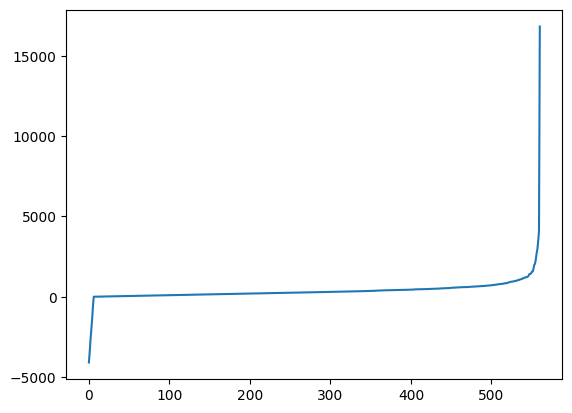

In [19]:
import matplotlib.pyplot as plt

plt.plot(sorted([int(x) for x in sorted(tokenizer.tokenizers[3].vocab)]))

In [28]:
tokenizer.detokenize([[1, 2]])

array([[224,   6]])

In [5]:
tokenizer.load(tokenizer_save_file)

In [12]:
tokenizer.detokenize([[1, 2]])

array([[177,  32]])